In [297]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from hw3 import io
from hw3 import smith_waterman
from hw3 import optimize
from sklearn import metrics
import random
import copy

In [2]:
def byFirst(elem):
    return elem[0]

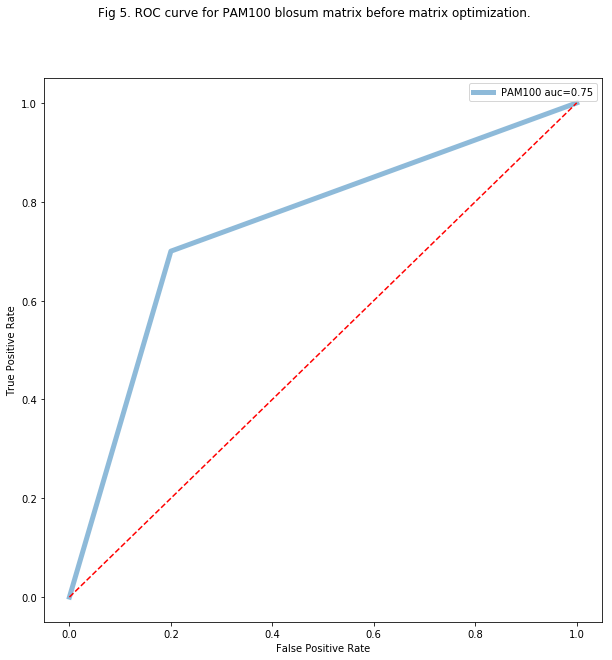

In [165]:
####
true_pos = io.import_pairs('data/Pospairs.txt')
true_neg = io.import_pairs('data/Negpairs.txt')
all_pairs = [true_pos,true_neg]
####
total_confusions = []
####
pen_gap_extend = -5
pen_gap_open = -6
####set plot parameters
plt.figure(figsize=(10,10))
#####################
#####loop through scoring matrices and calculate confusion for each one
#####################
matrix_num = 0
line_widths = [5,2]
###
for scoring_matrix in blosums:
    ##
    total_scores = []
    ########do alignments for all pairs
    for file in all_pairs:
        for pair in file:
            ###this contains just the scores
            output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
            total_scores.append([output[2],pair])
    ##########
    #####determine true positives by TPR = 0.7
    ###sort, largest to smallest
    total_scores.sort(key=byFirst,reverse=True)
    ####loop through and count TPR until matches TPR = 0.7
    TP = 0
    predicted_pos = []
    predicted_neg = []
    found_all_positives = False
    for alignment in total_scores:
        if found_all_positives == False:
            predicted_pos.append(alignment)
            if alignment[1] in true_pos: 
                TP += 1
                TPR = float(TP)/float(len(true_pos))
            if TPR == 0.7:
                found_all_positives = True
        else:
            predicted_neg.append(alignment)   
    ####prepare for plotting ROC curves
    label = []
    pred = []
    ###by counting
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    ##
    for alignment in predicted_pos:
        pred.append(1)
        if alignment[1] in true_pos:
            label.append(1)
            TP += 1
        else:
            label.append(0)
            FP += 1
    ##
    for alignment in predicted_neg:
        pred.append(0)
        if alignment[1] in true_neg:
            label.append(0)
            TN += 1
        else:
            label.append(1)
            FN += 1
    #####plot
    fpr, tpr, thresh = metrics.roc_curve(label, pred)
    auc = metrics.roc_auc_score(label, pred)
    ###
    fig = plt.plot(fpr,tpr,label=blosum_files[matrix_num]+" auc="+str(auc),linewidth=line_widths[matrix_num%2],alpha=0.5)
    #####save confusion matrix
    confusion = [blosum_files[matrix_num],[TP,FP,TN,FN]]
    total_confusions.append(confusion)
    #####
    matrix_num +=1
########
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=0)
plt.suptitle('Fig 5. ROC curve for PAM100 blosum matrix before matrix optimization.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 2 

#### 2.1. Particle Swarm optimization algorithm implemented in "optimize.py"

#### 2.2. Below: Optimization of PAM100 matrix (prior best).

In [ ]:
#####import blosum matrix
blosums = []
blosum_files = ['PAM100']
for file in blosum_files:
    importme = 'blosums/'+file
    blosums.append(io.import_blosum(importme))
###see what the fitness is prior to starting
calc_fitness(FPRs,blosums[0],true_pos,true_neg,pen_gap_open,pen_gap_extend)

### The fitness for PAM100 before optimization is: 
## 

In [ ]:
#####import blosum matrix
blosums = []
blosum_files = ['PAM100']
for file in blosum_files:
    importme = 'blosums/'+file
    blosums.append(io.import_blosum(importme))
###################
scoring_matrix = blosums[0]
FPRs = [0.0,0.1,0.2,0.3]
pen_gap_extend = -5
pen_gap_open = -6
true_pos = io.import_pairs('data/Pospairs.txt')
true_neg = io.import_pairs('data/Negpairs.txt')
particles = 25
iterations = 6
###################
output = optimize.particle_swarm(scoring_matrix,FPRs,pen_gap_extend,pen_gap_open,true_pos,true_neg,particles,iterations)



1.82
1.88
2.02
1.92
1.58
1.6
1.86
1.98
1.82
1.34
1.8
1.64
1.92
1.42
1.72
2.18
1.84
1.48
1.74
1.46
2.02
1.9
1.64
1.68
1.94
(1, 2.1799999999999997)
1.82
1.88
2.18
2.14
1.82
1.6
1.86
2.02
1.82
1.78
1.8
1.64
1.92
1.42
1.84
2.18
2.04
1.52
2.24
1.68
2.02
1.9
1.64
1.88
1.94
(2, 2.2399999999999998)


### The fitness after optimization is:
## 

In [275]:
1 % 2 










1

In [255]:
for particle in All_Particles:
    print('okay!')
    print(particle.v_curr)

okay!
[[-1.1826250566676393, -8.186164710478742, 2.1103365550184705, 1.24036779275075, -8.002425116345206, 2.3491824889338773, -3.9058595514947747, -6.8159388300368775, -9.071884260836692, -0.4129750244580741, -4.054172976781846, -5.660726006416761, -7.2383416795250355, 9.465151552335485, 9.149843048813366, 9.590517988444722, 1.360038968703119, -3.1255742408897333, 8.73781962077991, 5.843707150868221, 1.9257173245421288, -7.211043186049086, 15.974347275820545, 2.0645801290418717], [-8.186164710478742, -14.058252213527268, -13.30570902405072, -5.585099507810252, 6.81415570695027, -2.052653450665119, 7.063343741088509, -8.781446025202612, -10.086484524010025, 3.597841283765759, -9.944164014402645, 5.490920417668374, -0.3560232488856063, -2.7973606352024447, 12.19108663550716, -1.3650744359308522, 1.2428919796786886, 8.829436714920519, -0.6117318003351073, 4.152525084353414, -12.885412402710097, -3.5844933760268027, -2.7923066356052395, -1.4030057588403366], [2.1103365550184705, -13.30570

In [134]:
random.choice([0,1,2,3,4])

4

In [ ]:
#########determine true positives by FPR in {0.0,0.1,0.2,0.3}

####
total_confusions = []
####
pen_gap_extend = -5
pen_gap_open = -6
#####################
#####loop through scoring matrices and calculate confusion for each one
#####################
for scoring_matrix in blosums:
    total_scores = []
    ########do alignments for all pairs
    for file in all_pairs:
        for pair in file:
            ###this contains just the scores
            output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
            total_scores.append([output[2],pair])
    ##########
    
    ###sort, largest to smallest
    total_scores.sort(key=byFirst,reverse=True)
    ####loop through and count TPR until matches TPR = 0.7
    TP = 0
    predicted_pos = []
    predicted_neg = []
    found_all_positives = False
    for alignment in total_scores:
        if found_all_positives == False:
            predicted_pos.append(alignment)
            if alignment[1] in true_pos: 
                TP += 1
                TPR = float(TP)/float(len(true_pos))
            if TPR == 0.7:
                found_all_positives = True
        else:
            predicted_neg.append(alignment)   
    ####prepare for plotting ROC curves
    label = []
    pred = []
    ###by counting
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    ##
    for alignment in predicted_pos:
        pred.append(1)
        if alignment[1] in true_pos:
            label.append(1)
            TP += 1
        else:
            label.append(0)
            FP += 1
    ##
    for alignment in predicted_neg:
        pred.append(0)
        if alignment[1] in true_neg:
            label.append(0)
            TN += 1
        else:
            label.append(1)
            FN += 1
    #####plot
    fpr, tpr, thresh = metrics.roc_curve(label, pred)
    auc = metrics.roc_auc_score(label, pred)
    ###
    fig = plt.plot(fpr,tpr,label=blosum_files[matrix_num]+" auc="+str(auc),linewidth=line_widths[matrix_num%2],alpha=0.5)
    #####save confusion matrix
    confusion = [blosum_files[matrix_num],[TP,FP,TN,FN]]
    total_confusions.append(confusion)

########